<a href="https://colab.research.google.com/github/SheshamJoseph/Deep-Learning-with-Tensorflow-ZTM/blob/main/03_intro_to_cv_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to convolutional Neural Network and Computer Vision with Tensorflow

Computer vision is the practice of writing  algorithms which can discover patterns in visual data.

## Get the data

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# unzip
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-12-29 19:16:54--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.207, 108.177.98.207, 74.125.197.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  98.9MB/s    in 1.1s    

2023-12-29 19:16:55 (98.9 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data

In [2]:
!ls pizza_steak/train/steak/

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [3]:
import os

# walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/steak
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/steak
There are 0 directories and 250 images in pizza_steak/test/pizza


To visualize our images, first let's get the class names programatically

In [4]:
# Get the class names programatically
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) #created a list of class names from the subdirectory
print(class_names)

['pizza' 'steak']


In [5]:
# Let's viksualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # Setup the target directory
    target_folder = target_dir + target_class
    # Get a random image
    random_image = random.sample(os.listdir(target_folder), 1)
    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape : {img.shape}")
    return img

Image shape : (512, 512, 3)


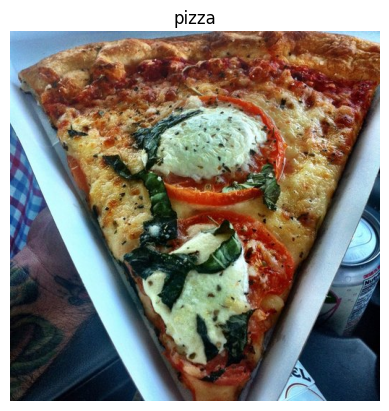

In [6]:
# View random image
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [7]:
img

array([[[155, 198, 240],
        [156, 199, 241],
        [154, 199, 241],
        ...,
        [153, 196, 228],
        [151, 194, 226],
        [148, 191, 223]],

       [[152, 195, 237],
        [152, 197, 238],
        [152, 197, 239],
        ...,
        [155, 204, 234],
        [154, 201, 231],
        [149, 198, 228]],

       [[149, 194, 235],
        [150, 195, 236],
        [150, 195, 237],
        ...,
        [154, 214, 240],
        [154, 211, 240],
        [150, 210, 238]],

       ...,

       [[ 17,  17,  17],
        [ 44,  44,  44],
        [ 28,  28,  26],
        ...,
        [  5,  14,  29],
        [  0,   7,  23],
        [  5,  13,  26]],

       [[ 18,  17,  15],
        [ 25,  24,  22],
        [ 24,  23,  21],
        ...,
        [  6,  18,  32],
        [  8,  17,  32],
        [  3,  12,  27]],

       [[ 41,  40,  38],
        [ 17,  16,  14],
        [ 37,  36,  34],
        ...,
        [ 12,  24,  40],
        [ 14,  23,  38],
        [  0,   8,  23]]

In [8]:
import tensorflow as tf
img_tensor = tf.constant(img)
img_tensor

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[155, 198, 240],
        [156, 199, 241],
        [154, 199, 241],
        ...,
        [153, 196, 228],
        [151, 194, 226],
        [148, 191, 223]],

       [[152, 195, 237],
        [152, 197, 238],
        [152, 197, 239],
        ...,
        [155, 204, 234],
        [154, 201, 231],
        [149, 198, 228]],

       [[149, 194, 235],
        [150, 195, 236],
        [150, 195, 237],
        ...,
        [154, 214, 240],
        [154, 211, 240],
        [150, 210, 238]],

       ...,

       [[ 17,  17,  17],
        [ 44,  44,  44],
        [ 28,  28,  26],
        ...,
        [  5,  14,  29],
        [  0,   7,  23],
        [  5,  13,  26]],

       [[ 18,  17,  15],
        [ 25,  24,  22],
        [ 24,  23,  21],
        ...,
        [  6,  18,  32],
        [  8,  17,  32],
        [  3,  12,  27]],

       [[ 41,  40,  38],
        [ 17,  16,  14],
        [ 37,  36,  34],
        ...,
        [ 12,  24,  4

## Preprocessing the data

In [9]:
# Get all the pixel values between 0 and 1
img / 255

array([[[0.60784314, 0.77647059, 0.94117647],
        [0.61176471, 0.78039216, 0.94509804],
        [0.60392157, 0.78039216, 0.94509804],
        ...,
        [0.6       , 0.76862745, 0.89411765],
        [0.59215686, 0.76078431, 0.88627451],
        [0.58039216, 0.74901961, 0.8745098 ]],

       [[0.59607843, 0.76470588, 0.92941176],
        [0.59607843, 0.77254902, 0.93333333],
        [0.59607843, 0.77254902, 0.9372549 ],
        ...,
        [0.60784314, 0.8       , 0.91764706],
        [0.60392157, 0.78823529, 0.90588235],
        [0.58431373, 0.77647059, 0.89411765]],

       [[0.58431373, 0.76078431, 0.92156863],
        [0.58823529, 0.76470588, 0.9254902 ],
        [0.58823529, 0.76470588, 0.92941176],
        ...,
        [0.60392157, 0.83921569, 0.94117647],
        [0.60392157, 0.82745098, 0.94117647],
        [0.58823529, 0.82352941, 0.93333333]],

       ...,

       [[0.06666667, 0.06666667, 0.06666667],
        [0.17254902, 0.17254902, 0.17254902],
        [0.10980392, 0

## An end-to-end example

For a CNN to find patterns in images we need to:
* Load the images
* Preprocess our images
* Build a CNN to find patterns
* Compile the CNN
* Fit the CNN to our training data

## Using the `tf.keras.preprocessing.ImageDataGenerator()` (deprecated)

In [10]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator # deprecated
# using tf.utils.image_dataset_from_directory() for next model

BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224
# set random seed
tf.random.set_seed(42)

# preprocess data (get all pixel values between 0 and 1)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# setup paths to our data directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# import data from directories and tur it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=BATCH_SIZE,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=BATCH_SIZE,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'), # filters, kernel_size
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile the CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# fit the model
hist_1 = model_1.fit(train_data, epochs=5,
                     steps_per_epoch=len(train_data),
                     validation_data=valid_data,
                     validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 17s 237ms/step - loss: 0.5929 - accuracy: 0.6687 - val_loss: 0.4129 - val_accuracy: 0.8420
Epoch 2/5
47/47 [==============================] - 9s 185ms/step - loss: 0.4202 - accuracy: 0.8120 - val_loss: 0.3450 - val_accuracy: 0.8580
Epoch 3/5
47/47 [==============================] - 8s 162ms/step - loss: 0.4022 - accuracy: 0.8280 - val_loss: 0.3686 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 6s 130ms/step - loss: 0.3413 - accuracy: 0.8607 - val_loss: 0.2875 - val_accuracy: 0.8800
Epoch 5/5
47/47 [==============================] - 6s 124ms/step - loss: 0.2529 - accuracy: 0.9027 - val_loss: 0.2936 - val_accuracy: 0.8680


In [11]:
# Model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

## Using the `tf.keras.utils.image_dataset_from_directory()`

In [12]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [13]:
# Using the tf.keras.image_dataset_from_directory()
train_dataset = tf.keras.utils.image_dataset_from_directory(
    directory=train_dir,
    label_mode='binary',
    seed=42,
    # class_names=class_names.all(),
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)


Found 1500 files belonging to 2 classes.


In [14]:
valid_dataset = tf.keras.utils.image_dataset_from_directory(
    directory=test_dir,
    label_mode='binary',
    seed=42,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)

Found 500 files belonging to 2 classes.


In [15]:
class_names = train_dataset.class_names

In [16]:
class_names

['pizza', 'steak']

### Configuring dataset for performance
Here we make sure to use buffered prefetching (storing data in  the cache before the processor uses it) so as to yield data from disk without having I/O blocking.

There are two wys to do this:
* `Dataset.cache`: keeps images in memory after they're loaded off disk durin first epoch
* `Dataset.prefetch`: over;aps data preprocessing and model execution while training

Since the number of elements to prefetch should be equal to (or possibly greater than) the number of batches consumed by a single training step, we will use `tf.data.AUTOTUNE` to prompt the tf.data runtime to tune this value dynamically at runtime


In [17]:
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
valid_dataset = valid_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [18]:
# Now to train a model
tf.random.set_seed(42)

# using TinyVGG's structure
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(1./255), # to standardize RGB values in to [0, 1] range
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

# fit the model
hist_2 = model_2.fit(train_dataset,
                     validation_data=valid_dataset,
                     epochs=10,
                     steps_per_epoch=len(train_dataset),
                     validation_steps=len(valid_dataset))

Epoch 1/10
47/47 [==============================] - 6s 79ms/step - loss: 0.5350 - accuracy: 0.7473 - val_loss: 0.5265 - val_accuracy: 0.7060
Epoch 2/10
47/47 [==============================] - 1s 31ms/step - loss: 0.4431 - accuracy: 0.8033 - val_loss: 0.4814 - val_accuracy: 0.7440
Epoch 3/10
47/47 [==============================] - 1s 31ms/step - loss: 0.4123 - accuracy: 0.8213 - val_loss: 0.3656 - val_accuracy: 0.8400
Epoch 4/10
47/47 [==============================] - 2s 35ms/step - loss: 0.3443 - accuracy: 0.8673 - val_loss: 0.3866 - val_accuracy: 0.8280
Epoch 5/10
47/47 [==============================] - 2s 33ms/step - loss: 0.2867 - accuracy: 0.8900 - val_loss: 0.4077 - val_accuracy: 0.8360
Epoch 6/10
47/47 [==============================] - 1s 32ms/step - loss: 0.2409 - accuracy: 0.9180 - val_loss: 0.4350 - val_accuracy: 0.8360
Epoch 7/10
47/47 [==============================] - 1s 32ms/step - loss: 0.2133 - accuracy: 0.9153 - val_loss: 0.3665 - val_accuracy: 0.8520
Epoch 8/10
47

## Using the same model on a different dataset

Let's replicate the model we've built in the previous cell to see if it works with our image data

The model we're building is from the Tensorflow playground

In [20]:
#   set random seed
tf.random.set_seed(42)

# create the tensorflow playground replica
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile the model
model_3.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

# fit the model
hist_3 = model_3.fit(train_dataset, epochs=5,
                     steps_per_epoch=len(train_dataset),
                     validation_data=valid_dataset,
                     validation_steps=len(valid_dataset))

Epoch 1/5
47/47 [==============================] - 2s 12ms/step - loss: 122.5152 - accuracy: 0.4940 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 0s 10ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 0s 10ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 0s 10ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 0s 9ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [21]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 150528)            0         
                                                                 
 dense_5 (Dense)             (None, 4)                 602116    
                                                                 
 dense_6 (Dense)             (None, 4)                 20        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

In [24]:
#  Improving our model_3
tf.random.set_seed(42)

# create model
model_4 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# fit the model
hist_4 = model_4.fit(train_dataset, epochs=10,
                     validation_data=valid_dataset,
                     steps_per_epoch=len(train_dataset),
                     validation_steps=len(valid_dataset))

Epoch 1/10
47/47 [==============================] - 2s 19ms/step - loss: 653.6310 - accuracy: 0.5800 - val_loss: 278.3699 - val_accuracy: 0.5480
Epoch 2/10
47/47 [==============================] - 1s 14ms/step - loss: 183.4478 - accuracy: 0.6773 - val_loss: 179.4972 - val_accuracy: 0.5880
Epoch 3/10
47/47 [==============================] - 1s 17ms/step - loss: 116.5768 - accuracy: 0.7113 - val_loss: 43.6050 - val_accuracy: 0.7680
Epoch 4/10
47/47 [==============================] - 1s 14ms/step - loss: 68.1415 - accuracy: 0.7147 - val_loss: 58.9367 - val_accuracy: 0.6140
Epoch 5/10
47/47 [==============================] - 1s 13ms/step - loss: 42.5098 - accuracy: 0.7587 - val_loss: 34.8329 - val_accuracy: 0.6840
Epoch 6/10
47/47 [==============================] - 1s 13ms/step - loss: 31.7991 - accuracy: 0.7453 - val_loss: 20.2403 - val_accuracy: 0.7740
Epoch 7/10
47/47 [==============================] - 1s 13ms/step - loss: 40.5700 - accuracy: 0.7320 - val_loss: 67.6632 - val_accuracy: 0

In [25]:
model_4.evaluate(valid_dataset)

16/16 [==============================] - 0s 10ms/step - loss: 10.8637 - accuracy: 0.7660


[10.86372184753418, 0.765999972820282]

In [26]:
model_2.evaluate(valid_dataset)

16/16 [==============================] - 0s 19ms/step - loss: 0.5954 - accuracy: 0.7940


[0.5953783392906189, 0.7940000295639038]

In [27]:
model_1.evaluate(valid_dataset)

16/16 [==============================] - 3s 20ms/step - loss: 4.0672 - accuracy: 0.7340


[4.067249298095703, 0.734000027179718]

## Bnary Classification : Let's break it down

1. Become one with the data(Visualize)
2. Preprocess the data(here we scaled/normalized)
3. Create a model(start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve model(try to beat baseline)
7. Repeat until satisfied

### 1. Visualize

Image shape : (512, 512, 3)
Image shape : (512, 512, 3)


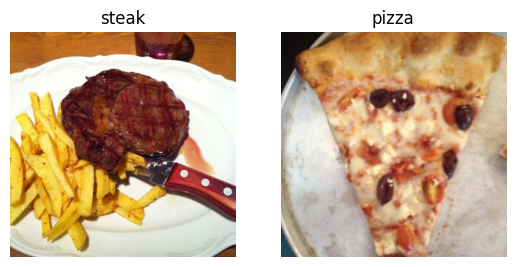

In [37]:
plt.figure()
plt.subplot(1, 2, 1)
steak_image = view_random_image('pizza_steak/train/', 'steak')
plt.subplot(1, 2, 2)
pizza_image = view_random_image('pizza_steak/train/', 'pizza')

### Preprocess our data

In [40]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Next is to turn our data into **batches**(A subset of the data). This is done because:
1. 10,000(or more) images will not fit in our computer's processor
2. Trying to learn patterns from that amount of images reduces our model's performance



In [41]:
# Load images from directory
train_dataset = tf.keras.utils.image_dataset_from_directory(
    directory=train_dir,
    labels='inferred',
    label_mode='binary',
    batch_size=32,
    seed=42,
    image_size=(IMG_HEIGHT, IMG_WIDTH)
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    directory=test_dir,
    labels='inferred',
    label_mode='binary',
    batch_size=32,
    seed=42,
    image_size=(IMG_HEIGHT, IMG_WIDTH)
)

Found 1500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
